### Student Information
Name: 周芊妤

Student ID: 711233118

GitHub ID: ChienYuuuuu

Kaggle name: ChouChienYuuuuu

Kaggle private scoreboard snapshot:

![Kaggle score](./pic0.png)

## Kaggle 

### Data

In [ ]:
import json
import pandas as pd

file_path = r'D:\周芊妤\DMLab2_ori\dm-2024-isa-5810-lab-2-homework\tweets_DM.json'

# Read JSON and parse it into a dictionary
tweets_DM_Kag = []
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        tweets_DM_Kag.append(json.loads(line))

tweets_data = []
for tweet in tweets_DM_Kag:
    tweet_info = tweet["_source"]["tweet"]
    tweet_info["score"] = tweet["_score"]  # 添加分數
    tweet_info["crawldate"] = tweet["_crawldate"]  # 添加抓取日期
    tweets_data.append(tweet_info)

df = pd.DataFrame(tweets_data)
df

,hashtags,tweet_id,text,score,crawldate
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",391,2015-05-23 11:42:47
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",433,2016-01-28 04:52:09
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",232,2017-12-25 04:39:20
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,376,2016-01-24 23:53:05
4,[],0x2de201,"""Trust is not the same as faith. A friend is s...",989,2016-01-08 17:18:59
...,...,...,...,...,...
1867530,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...,827,2015-05-12 12:51:52
1867531,[],0x29d0cb,I swear all this hard work gone pay off one da...,368,2017-10-02 17:54:04
1867532,[],0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...,498,2016-10-10 11:04:32
1867533,[],0x24faed,"Ah, corporate life, where you can date <LH> us...",840,2016-09-02 14:25:06


In [2]:
import pandas as pd

file_path = r'D:\周芊妤\DMLab2_ori\dm-2024-isa-5810-lab-2-homework\data_identification.csv'

data_identification_Kag = pd.read_csv(file_path)
data_identification_Kag.head()

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train


In [3]:
import pandas as pd

file_path = r'D:\周芊妤\DMLab2_ori\dm-2024-isa-5810-lab-2-homework\emotion.csv'

data_emotion_Kag = pd.read_csv(file_path)
data_emotion_Kag.head()

# There are 8 different emotions in the dataset.
# emotions: anger, anticipation, disgust, fear, joy, sadness, surprise, and trust.

,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation


In [4]:
emotion_count_Kag = data_emotion_Kag['emotion'].value_counts()
emotion_count_Kag

# There are 516107 tweets in the 'joy' category,
# 248935 tweets in the 'anticipation' category, 
# 205478 tweets in the 'trust' category, 
# 193437 tweets in the 'sadness' category, 
# 139101 tweets in the 'disgust' category,
# 63999 tweets in the 'fear' category, 
# 48729 tweets in the 'surprise' category, 
# and 39867 tweets in the 'anger' category.

emotion
joy             516017
anticipation    248935
trust           205478
sadness         193437
disgust         139101
fear             63999
surprise         48729
anger            39867
Name: count, dtype: int64

In [5]:
data_Kag = pd.merge(data_identification_Kag, data_emotion_Kag, on='tweet_id', how='outer')
data_Kag = pd.merge(data_Kag, df, on='tweet_id', how='left')
data_Kag = data_Kag[['tweet_id', 'identification', 'text', 'emotion']]
data_Kag.head()

,tweet_id,identification,text,emotion
0,0x1c7f0f,test,"@JZED74 While inappropriate AF, he likely wasn...",NaN
1,0x1c7f10,train,o m g Shut Up And Dance though #BlackMirror <LH>,joy
2,0x1c7f11,train,On #twitch <LH> on the #Destinybeta #Destiny #...,anticipation
3,0x1c7f12,test,I tried to figure out why you mean so much to ...,NaN
4,0x1c7f13,test,"The only “big plan” you ever had in your life,...",NaN


In [6]:
data_train_Kag = data_Kag[data_Kag['identification'] == 'train']
data_train_Kag.head()

,tweet_id,identification,text,emotion
1,0x1c7f10,train,o m g Shut Up And Dance though #BlackMirror <LH>,joy
2,0x1c7f11,train,On #twitch <LH> on the #Destinybeta #Destiny #...,anticipation
5,0x1c7f14,train,A nice sunny wak this morning not many <LH> ar...,joy
6,0x1c7f15,train,I'm one of those people who love candy corn......,joy
7,0x1c7f16,train,@metmuseum What are these? They look like some...,disgust


In [7]:
data_test_Kag = data_Kag[data_Kag['identification'] == 'test']
data_test_Kag.head()

,tweet_id,identification,text,emotion
0,0x1c7f0f,test,"@JZED74 While inappropriate AF, he likely wasn...",NaN
3,0x1c7f12,test,I tried to figure out why you mean so much to ...,NaN
4,0x1c7f13,test,"The only “big plan” you ever had in your life,...",NaN
8,0x1c7f17,test,"Looking back on situations old & new, recent o...",NaN
9,0x1c7f18,test,@jasoninthehouse Why do you insist on talking ...,NaN


In [8]:
# shuffle dataset # randomly reorder the data
data_train_Kag = data_train_Kag.sample(frac=1, random_state=55)
data_test_Kag = data_test_Kag.sample(frac=1, random_state=55)

In [9]:
print("Shape of Training df: ", data_train_Kag.shape)
print("Shape of Testing df: ", data_test_Kag.shape)

# There are 1455563 tweets in the training dataset and 411972 tweets in the testing dataset.

Shape of Training df:  (1455563, 4)
Shape of Testing df:  (411972, 4)


Save Data (to .pkl)

In [10]:
## save to pickle file
data_train_Kag.to_pickle("./train_df.pkl") 
data_test_Kag.to_pickle("./test_df.pkl")

In [11]:
import pandas as pd

## load a pickle file
data_train_Kag = pd.read_pickle("./train_df.pkl")
data_test_Kag = pd.read_pickle("./test_df.pkl")

In [12]:
print(data_train_Kag.shape)
print(data_train_Kag)
print(data_test_Kag.shape)
print(data_test_Kag.shape[0]/(data_test_Kag.shape[0]+data_train_Kag.shape[0]))

(1455563, 4)
         tweet_id identification  \
322852   0x216c33          train   
602268   0x25afab          train   
501554   0x242641          train   
1427702  0x324805          train   
934696   0x2ac237          train   
...           ...            ...   
517330   0x2463e1          train   
1847049  0x38ae18          train   
1451938  0x32a6b1          train   
1351984  0x31203f          train   
1845094  0x38a675          train   

                                                      text       emotion  
322852   @tribelaw No doubt George Papadopoulos' rep wa...       sadness  
602268      @KelliesTravels I must agree! <LH> #getaway 💛🌴           joy  
501554            Gratitude is the best attitude <LH> ❤️🙏🏼         trust  
1427702  Movie time after a long day today #much <LH> #...  anticipation  
934696   Looks like we goin to ATL for a bit then Los A...           joy  
...                                                    ...           ...  
517330   God forbid, but a nu

### Exploratory data analysis (EDA)

The 30 most frequent words in the document.

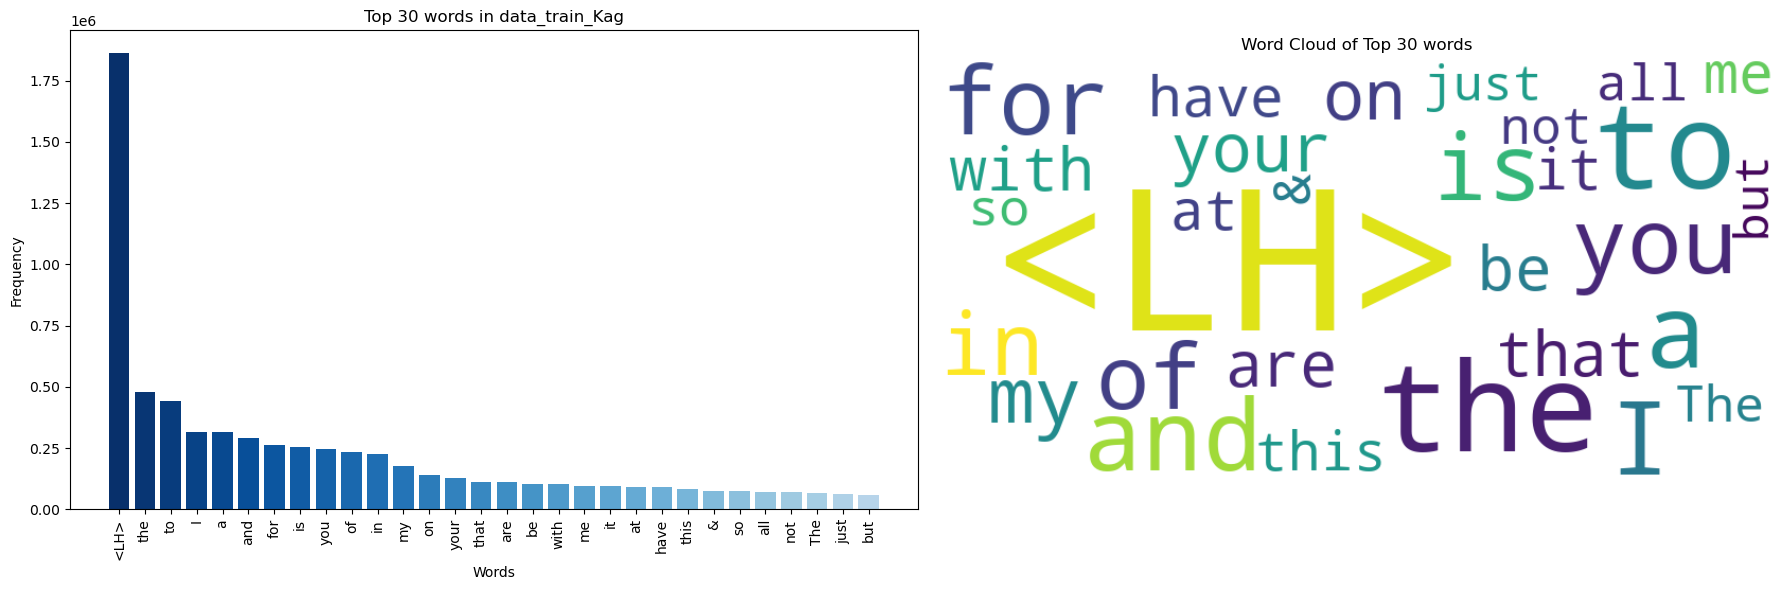

In [13]:
# data_train_Kag

from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# The first 30 words in data_train_Kag.
data_train_Kag_freq = data_train_Kag['text'].str.split(expand=True).stack().value_counts() # frequency
data_train_Kag_top30 = data_train_Kag_freq[0:30]

colors = plt.cm.Blues(np.linspace(1, 0.3, len(data_train_Kag_top30)))

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# bar plot
axes[0].bar(data_train_Kag_top30.index, data_train_Kag_top30.values, color=colors) # bar plot
axes[0].set_title('Top 30 words in data_train_Kag')
axes[0].set_xlabel('Words') 
axes[0].set_ylabel('Frequency') 
axes[0].tick_params(axis='x', rotation=90) 

# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(data_train_Kag_top30)
axes[1].imshow(wordcloud, interpolation='bilinear')
axes[1].axis('off') 
axes[1].set_title('Word Cloud of Top 30 words')

plt.tight_layout()
plt.show()

# The most common words in data_train_Kag is 'the', and the second one is 'to'.

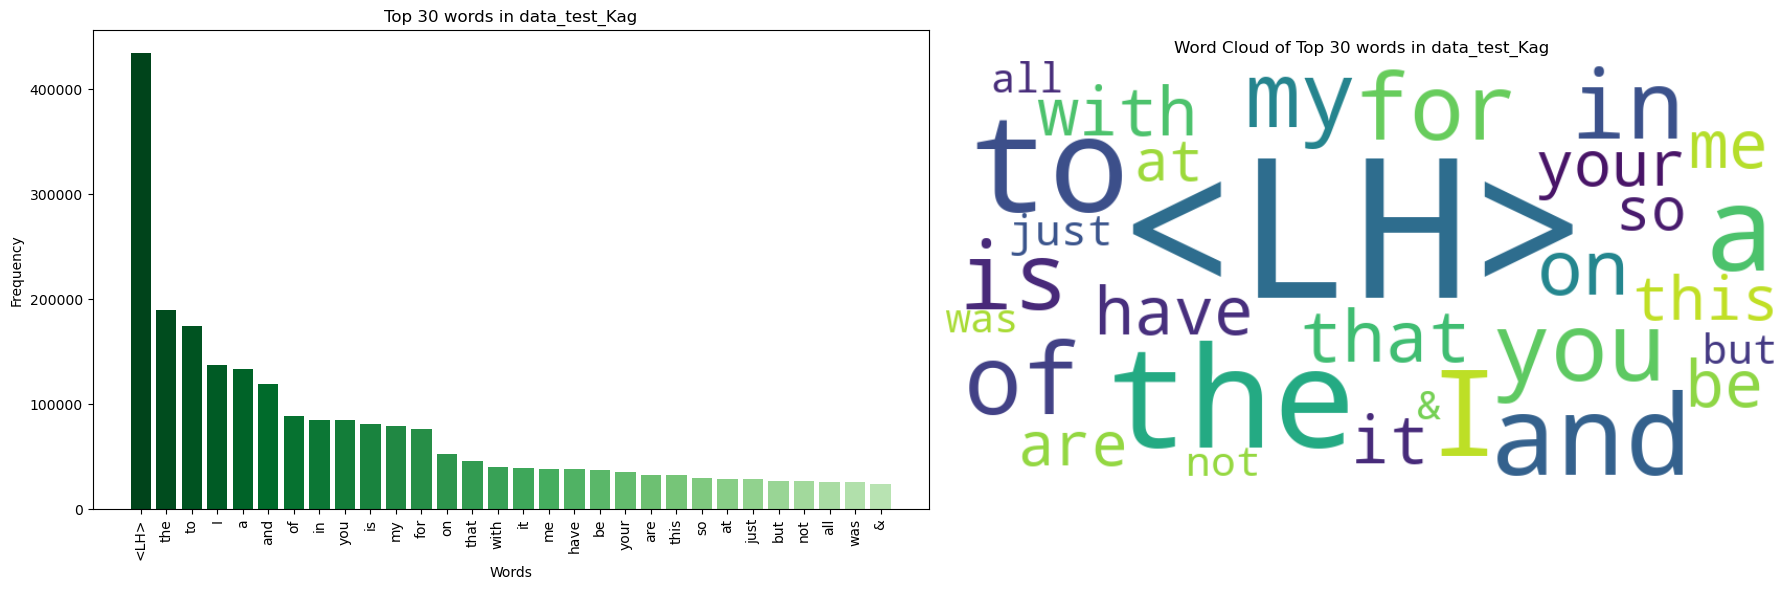

In [14]:
# data_test_Kag

from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# The first 30 words in data_test_Kag.
data_test_Kag_freq = data_test_Kag['text'].str.split(expand=True).stack().value_counts()
data_test_Kag_top30 = data_test_Kag_freq[0:30]

colors = plt.cm.Greens(np.linspace(1, 0.3, len(data_test_Kag_top30)))

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# bar plot
axes[0].bar(data_test_Kag_top30.index, data_test_Kag_top30.values, color=colors)
axes[0].set_title('Top 30 words in data_test_Kag')
axes[0].set_xlabel('Words') 
axes[0].set_ylabel('Frequency') 
axes[0].tick_params(axis='x', rotation=90) 

# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(data_test_Kag_top30)
axes[1].imshow(wordcloud, interpolation='bilinear')
axes[1].axis('off') 
axes[1].set_title('Word Cloud of Top 30 words in data_test_Kag')

plt.tight_layout()
plt.show()

# The most common words in data_test_Kag is 'the', and the second one is 'to', the frequencies of them are almost the same.

The number of texts for each emotion classification.

In [ ]:
# group to find distribution
data_train_Kag.groupby(['emotion']).count()['text']

# There are 39867 texts in anger, 248935 in anticipation, 
# 139101 in disgust, 63999 texts in fear, 516017 texts in joy, 
# 193437 texts in sadness, 48729 in surprise, and 205478 texts in trust.
# The most common emotion is joy. 
# The least common emotion is anger.

emotion
anger            39867
anticipation    248935
disgust         139101
fear             63999
joy             516017
sadness         193437
surprise         48729
trust           205478
Name: text, dtype: int64

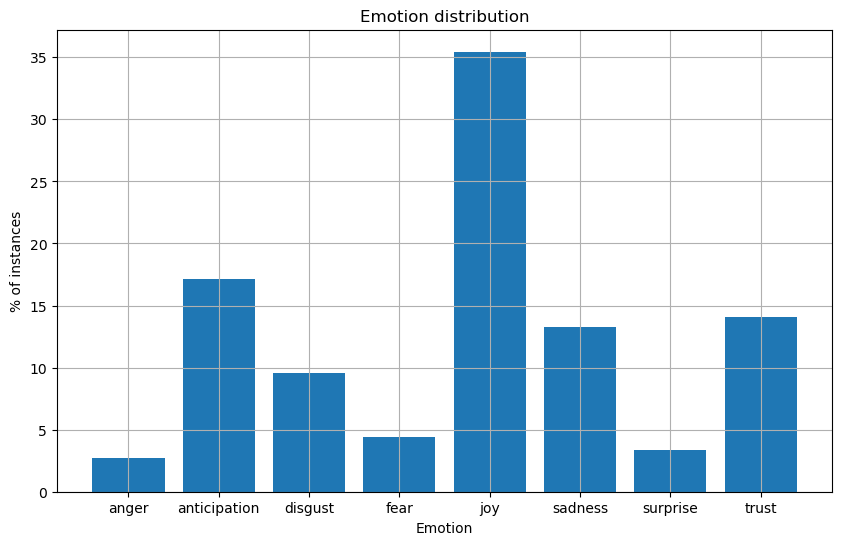

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = data_train_Kag['emotion'].unique()
post_total = len(data_train_Kag)
df1 = data_train_Kag.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(10,6))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

# There are 39867 texts in anger, 248935 in anticipation, 139101 in disgust, 
# 63999 texts in fear, 516017 texts in joy, 193437 texts in sadness, 
# 48729 in surprise, and 205478 texts in trust.
# The most common emotion is joy. 
# The least common emotion is anger.

### Pre-processing the data.

In [17]:
#We can see the data to use in the training phase
data_train_Kag['text']

322852     @tribelaw No doubt George Papadopoulos' rep wa...
602268        @KelliesTravels I must agree! <LH> #getaway 💛🌴
501554              Gratitude is the best attitude <LH> ❤️🙏🏼
1427702    Movie time after a long day today #much <LH> #...
934696     Looks like we goin to ATL for a bit then Los A...
                                 ...                        
517330     God forbid, but a nuclear war would finish off...
1847049    @chicagotribune   Who said taxes couldn't be p...
1451938    Luke5:15-16 'But now even more..But he would w...
1351984    🕘 12:00 13 Aug <LH> 🇺🇸USD = 9,43 🇪🇺EUR = 11,15...
1845094    <LH> for the people in my life that have made ...
Name: text, Length: 1455563, dtype: object

In [ ]:
import re
import emoji
from transformers import BertTokenizer
from tqdm import tqdm

# Load BERT Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

# Set the number of most common tokens to keep
max_vocab_size = 10000

# Get the vocabulary and select the most common 10000 tokens
vocab = tokenizer.get_vocab()
most_frequent_tokens = list(vocab.keys())[:max_vocab_size]

# Preprocess function
def preprocess_text(text):
    # Remove URL
    # text = re.sub(r"http\S+|www\S+", "[URL]", text)
    text = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", "[URL]", text)

    # emoji to text
    text = emoji.demojize(text)  
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # @mentions
    text = re.sub(r'@\w+', '[mention]', text)
    
    # #hashtags
    text = re.sub(r'#\w+', '[hashtag]', text)
    
    # transform text to lowercase
    text = text.lower()
    
    return text

# Use BERT Tokenizer for Tokenization and keep only the most 128 common tokens
def tokenize_text(text):
    # Preprocess text
    processed_text = preprocess_text(text)
    
    # Use BERT Tokenizer for Tokenization
    encoding = tokenizer(processed_text, truncation=True, padding='max_length', max_length=128, return_tensors='pt')
    
    # Extract numerical indices
    input_ids = encoding['input_ids'][0].tolist()
    
    filtered_ids = [id for id in input_ids if tokenizer.convert_ids_to_tokens(id) in most_frequent_tokens]
    
    # Show the corresponding tokens
    tokens = tokenizer.convert_ids_to_tokens(filtered_ids)
    
    return tokens, filtered_ids

tqdm.pandas()  
data_train_Kag['tokens'], data_train_Kag['input_ids'] = zip(*data_train_Kag['text'].progress_apply(tokenize_text))
data_train_Kag

100%|██████████| 1455563/1455563 [18:28<00:00, 1312.93it/s]


,tweet_id,identification,text,emotion,tokens,input_ids
322852,0x216c33,train,@tribelaw No doubt George Papadopoulos' rep wa...,sadness,"[[CLS], tribe, ##law, no, doubt, g, ##ge, p, #...","[101, 6128, 9598, 1185, 4095, 176, 2176, 185, ..."
602268,0x25afab,train,@KelliesTravels I must agree! <LH> #getaway 💛🌴,joy,"[[CLS], k, ##est, ##ls, i, must, agree, l, ##h...","[101, 180, 2556, 3447, 178, 1538, 5340, 181, 1..."
501554,0x242641,train,Gratitude is the best attitude <LH> ❤️🙏🏼,trust,"[[CLS], is, the, best, attitude, l, ##h, red, ...","[101, 1110, 1103, 1436, 7533, 181, 1324, 1894,..."
1427702,0x324805,train,Movie time after a long day today #much <LH> #...,anticipation,"[[CLS], movie, time, after, a, long, day, toda...","[101, 2523, 1159, 1170, 170, 1263, 1285, 2052,..."
934696,0x2ac237,train,Looks like we goin to ATL for a bit then Los A...,joy,"[[CLS], looks, like, we, to, at, ##l, for, a, ...","[101, 2736, 1176, 1195, 1106, 1120, 1233, 1111..."
...,...,...,...,...,...,...
517330,0x2463e1,train,"God forbid, but a nuclear war would finish off...",joy,"[[CLS], god, for, but, a, nuclear, war, would,...","[101, 5540, 1111, 1133, 170, 4272, 1594, 1156,..."
1847049,0x38ae18,train,@chicagotribune Who said taxes couldn't be p...,surprise,"[[CLS], ##ica, ##ri, ##bu, ##ne, who, said, ta...","[101, 4578, 2047, 7925, 1673, 1150, 1163, 7538..."
1451938,0x32a6b1,train,Luke5:15-16 'But now even more..But he would w...,anticipation,"[[CLS], l, ##6, but, now, even, more, he, woul...","[101, 181, 1545, 1133, 1208, 1256, 1167, 1119,..."
1351984,0x31203f,train,"🕘 12:00 13 Aug <LH> 🇺🇸USD = 9,43 🇪🇺EUR = 11,15...",anger,"[[CLS], nine, _, o, ##c, ##lock, 13, ##g, l, #...","[101, 2551, 168, 184, 1665, 6726, 1492, 1403, ..."


在這邊做的前處理有：
 - 移除 URL\
 將任何以 http:// 或 https:// 開頭的網址替換為 [URL]。
 - 將表情符號轉換為文字描述\
 將表情符號轉換為對應的文字描述，例如 😀 被轉換為: grinning_face:。
 - 移除標點符號\
 移除所有非文字或非空白字符的標點符號。
 - 處理 @ 提及
 - 處理 # 主題標籤
 - 轉換為小寫

In [ ]:
csv_file_path = "D:/周芊妤/DMLab2_ori/DM2024-Lab2-Homework/data_train_Kag_pre.csv"
data_train_Kag.to_csv(csv_file_path, index=False, encoding="utf-8")

In [ ]:
import pandas as pd
file_path = "D:/周芊妤/DMLab2_ori/DM2024-Lab2-Homework/data_train_Kag_pre.csv"
data_train_Kag = pd.read_csv(file_path)
data_train_Kag

,tweet_id,identification,text,emotion,tokens,input_ids
0,0x216c33,train,@tribelaw No doubt George Papadopoulos' rep wa...,sadness,"['[CLS]', 'tribe', '##law', 'no', 'doubt', 'g'...","[101, 6128, 9598, 1185, 4095, 176, 2176, 185, ..."
1,0x25afab,train,@KelliesTravels I must agree! <LH> #getaway 💛🌴,joy,"['[CLS]', 'k', '##est', '##ls', 'i', 'must', '...","[101, 180, 2556, 3447, 178, 1538, 5340, 181, 1..."
2,0x242641,train,Gratitude is the best attitude <LH> ❤️🙏🏼,trust,"['[CLS]', 'is', 'the', 'best', 'attitude', 'l'...","[101, 1110, 1103, 1436, 7533, 181, 1324, 1894,..."
3,0x324805,train,Movie time after a long day today #much <LH> #...,anticipation,"['[CLS]', 'movie', 'time', 'after', 'a', 'long...","[101, 2523, 1159, 1170, 170, 1263, 1285, 2052,..."
4,0x2ac237,train,Looks like we goin to ATL for a bit then Los A...,joy,"['[CLS]', 'looks', 'like', 'we', 'to', 'at', '...","[101, 2736, 1176, 1195, 1106, 1120, 1233, 1111..."
...,...,...,...,...,...,...
1455558,0x2463e1,train,"God forbid, but a nuclear war would finish off...",joy,"['[CLS]', 'god', 'for', 'but', 'a', 'nuclear',...","[101, 5540, 1111, 1133, 170, 4272, 1594, 1156,..."
1455559,0x38ae18,train,@chicagotribune Who said taxes couldn't be p...,surprise,"['[CLS]', '##ica', '##ri', '##bu', '##ne', 'wh...","[101, 4578, 2047, 7925, 1673, 1150, 1163, 7538..."
1455560,0x32a6b1,train,Luke5:15-16 'But now even more..But he would w...,anticipation,"['[CLS]', 'l', '##6', 'but', 'now', 'even', 'm...","[101, 181, 1545, 1133, 1208, 1256, 1167, 1119,..."
1455561,0x31203f,train,"🕘 12:00 13 Aug <LH> 🇺🇸USD = 9,43 🇪🇺EUR = 11,15...",anger,"['[CLS]', 'nine', '_', 'o', '##c', '##lock', '...","[101, 2551, 168, 184, 1665, 6726, 1492, 1403, ..."


In [ ]:
import pandas as pd
import ast

# Ensure that the 'input_ids' column is a valid string list format, and then convert it back to a list
data_train_Kag['input_ids'] = data_train_Kag['input_ids'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Ensure that 'input_ids' is a list containing integers
data_train_Kag['input_ids'] = data_train_Kag['input_ids'].apply(lambda x: [int(i) for i in x])
data_train_Kag

,tweet_id,identification,text,emotion,tokens,input_ids
0,0x216c33,train,@tribelaw No doubt George Papadopoulos' rep wa...,sadness,"['[CLS]', 'tribe', '##law', 'no', 'doubt', 'g'...","[101, 6128, 9598, 1185, 4095, 176, 2176, 185, ..."
1,0x25afab,train,@KelliesTravels I must agree! <LH> #getaway 💛🌴,joy,"['[CLS]', 'k', '##est', '##ls', 'i', 'must', '...","[101, 180, 2556, 3447, 178, 1538, 5340, 181, 1..."
2,0x242641,train,Gratitude is the best attitude <LH> ❤️🙏🏼,trust,"['[CLS]', 'is', 'the', 'best', 'attitude', 'l'...","[101, 1110, 1103, 1436, 7533, 181, 1324, 1894,..."
3,0x324805,train,Movie time after a long day today #much <LH> #...,anticipation,"['[CLS]', 'movie', 'time', 'after', 'a', 'long...","[101, 2523, 1159, 1170, 170, 1263, 1285, 2052,..."
4,0x2ac237,train,Looks like we goin to ATL for a bit then Los A...,joy,"['[CLS]', 'looks', 'like', 'we', 'to', 'at', '...","[101, 2736, 1176, 1195, 1106, 1120, 1233, 1111..."
...,...,...,...,...,...,...
1455558,0x2463e1,train,"God forbid, but a nuclear war would finish off...",joy,"['[CLS]', 'god', 'for', 'but', 'a', 'nuclear',...","[101, 5540, 1111, 1133, 170, 4272, 1594, 1156,..."
1455559,0x38ae18,train,@chicagotribune Who said taxes couldn't be p...,surprise,"['[CLS]', '##ica', '##ri', '##bu', '##ne', 'wh...","[101, 4578, 2047, 7925, 1673, 1150, 1163, 7538..."
1455560,0x32a6b1,train,Luke5:15-16 'But now even more..But he would w...,anticipation,"['[CLS]', 'l', '##6', 'but', 'now', 'even', 'm...","[101, 181, 1545, 1133, 1208, 1256, 1167, 1119,..."
1455561,0x31203f,train,"🕘 12:00 13 Aug <LH> 🇺🇸USD = 9,43 🇪🇺EUR = 11,15...",anger,"['[CLS]', 'nine', '_', 'o', '##c', '##lock', '...","[101, 2551, 168, 184, 1665, 6726, 1492, 1403, ..."


In [ ]:
import torch

# Use PyTorch to pad the sequence to a fixed length and generate the corresponding attention_mask
def pad_sequences_with_attention_mask(input_ids_list, max_len=50, pad_value=0):
    """
    使用 PyTorch 填充序列到固定長度，並生成對應的 attention_mask。
    Use PyTorch to pad the sequence to a fixed length and generate the corresponding attention_mask
    """
    padded_sequences = []
    attention_masks = []
    
    for seq in input_ids_list:
        # Pad or truncate input_ids
        if len(seq) > max_len:
            seq = seq[:max_len]  # truncate if too long
        else:
            seq = seq + [pad_value] * (max_len - len(seq))  # pad if too short
        
        # Generate the corresponding attention_mask, set the padding part to 0, and the other part to 1
        # mask = [1] * len(seq) + [0] * (max_len - len(seq))
        mask = [1] * len(seq[:max_len]) + [0] * (max_len - len(seq[:max_len]))
        
        padded_sequences.append(seq)
        attention_masks.append(mask)
    
    # Return data in Tensor format
    return torch.tensor(padded_sequences), torch.tensor(attention_masks)

data_train_Kag_input_ids = data_train_Kag['input_ids'].tolist()
padded_input_ids, attention_masks = pad_sequences_with_attention_mask(data_train_Kag_input_ids, max_len=50)

# it is necessary to ensure that the data format is a list rather than a Tensor, 
# because pandas lists will be automatically converted to a list format
data_train_Kag['padded_input_ids'] = padded_input_ids.tolist()
data_train_Kag['attention_mask'] = attention_masks.tolist()
print(data_train_Kag[['tokens', 'padded_input_ids', 'attention_mask']].head())

# Check if the lengths after padding are consistent
print("All padded_input_ids lengths are 50:", all(len(seq) == 50 for seq in padded_input_ids))
print("All attention_mask lengths are 50:", all(len(mask) == 50 for mask in attention_masks))

                                              tokens  \
0  ['[CLS]', 'tribe', '##law', 'no', 'doubt', 'g'...   
1  ['[CLS]', 'k', '##est', '##ls', 'i', 'must', '...   
2  ['[CLS]', 'is', 'the', 'best', 'attitude', 'l'...   
3  ['[CLS]', 'movie', 'time', 'after', 'a', 'long...   
4  ['[CLS]', 'looks', 'like', 'we', 'to', 'at', '...   

                                    padded_input_ids  \
0  [101, 6128, 9598, 1185, 4095, 176, 2176, 185, ...   
1  [101, 180, 2556, 3447, 178, 1538, 5340, 181, 1...   
2  [101, 1110, 1103, 1436, 7533, 181, 1324, 1894,...   
3  [101, 2523, 1159, 1170, 170, 1263, 1285, 2052,...   
4  [101, 2736, 1176, 1195, 1106, 1120, 1233, 1111...   

                                      attention_mask  
0  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  
1  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  
2  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  
3  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  
4  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..

這段程式碼的目的是將輸入的向量長度統一，讓它們符合模型的需求。長度可以根據不同需求做調整，在這裡我們設定最大長度是 50。如果有向量的長度小於 50，程式會自動用 0 來填補，直到它的長度達到達到 50；如果長度超過 50，則會把超過的部分截斷，保留前 50 個元素。這樣每個序列的長度都會是 50。

同時，程式也會生成一個 attention_mask，用來告訴模型哪些部分是真正的資料，哪些是填充的部分，其中 1 代表這是有效的資料，0 代表這是填充的部分。這樣做可以讓模型知道在訓練過程中要忽略填充的部分，專注於真實的資料。

In [23]:
data_train_Kag

,tweet_id,identification,text,emotion,tokens,input_ids,padded_input_ids,attention_mask
0,0x216c33,train,@tribelaw No doubt George Papadopoulos' rep wa...,sadness,"['[CLS]', 'tribe', '##law', 'no', 'doubt', 'g'...","[101, 6128, 9598, 1185, 4095, 176, 2176, 185, ...","[101, 6128, 9598, 1185, 4095, 176, 2176, 185, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,0x25afab,train,@KelliesTravels I must agree! <LH> #getaway 💛🌴,joy,"['[CLS]', 'k', '##est', '##ls', 'i', 'must', '...","[101, 180, 2556, 3447, 178, 1538, 5340, 181, 1...","[101, 180, 2556, 3447, 178, 1538, 5340, 181, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,0x242641,train,Gratitude is the best attitude <LH> ❤️🙏🏼,trust,"['[CLS]', 'is', 'the', 'best', 'attitude', 'l'...","[101, 1110, 1103, 1436, 7533, 181, 1324, 1894,...","[101, 1110, 1103, 1436, 7533, 181, 1324, 1894,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,0x324805,train,Movie time after a long day today #much <LH> #...,anticipation,"['[CLS]', 'movie', 'time', 'after', 'a', 'long...","[101, 2523, 1159, 1170, 170, 1263, 1285, 2052,...","[101, 2523, 1159, 1170, 170, 1263, 1285, 2052,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,0x2ac237,train,Looks like we goin to ATL for a bit then Los A...,joy,"['[CLS]', 'looks', 'like', 'we', 'to', 'at', '...","[101, 2736, 1176, 1195, 1106, 1120, 1233, 1111...","[101, 2736, 1176, 1195, 1106, 1120, 1233, 1111...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
...,...,...,...,...,...,...,...,...
1455558,0x2463e1,train,"God forbid, but a nuclear war would finish off...",joy,"['[CLS]', 'god', 'for', 'but', 'a', 'nuclear',...","[101, 5540, 1111, 1133, 170, 4272, 1594, 1156,...","[101, 5540, 1111, 1133, 170, 4272, 1594, 1156,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1455559,0x38ae18,train,@chicagotribune Who said taxes couldn't be p...,surprise,"['[CLS]', '##ica', '##ri', '##bu', '##ne', 'wh...","[101, 4578, 2047, 7925, 1673, 1150, 1163, 7538...","[101, 4578, 2047, 7925, 1673, 1150, 1163, 7538...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1455560,0x32a6b1,train,Luke5:15-16 'But now even more..But he would w...,anticipation,"['[CLS]', 'l', '##6', 'but', 'now', 'even', 'm...","[101, 181, 1545, 1133, 1208, 1256, 1167, 1119,...","[101, 181, 1545, 1133, 1208, 1256, 1167, 1119,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1455561,0x31203f,train,"🕘 12:00 13 Aug <LH> 🇺🇸USD = 9,43 🇪🇺EUR = 11,15...",anger,"['[CLS]', 'nine', '_', 'o', '##c', '##lock', '...","[101, 2551, 168, 184, 1665, 6726, 1492, 1403, ...","[101, 2551, 168, 184, 1665, 6726, 1492, 1403, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [ ]:
# convert the emotion labels to numerical values.
# anger, anticipation, disgust, fear, joy, sadness, surprise, trust

labels = set(data_train_Kag['emotion'])  
labels_to_index = {label: idx for idx, label in enumerate(labels)}
index_to_labels = {idx: label for label, idx in labels_to_index.items()}

# Convert labels to numbers
data_train_Kag['emotion_index'] = data_train_Kag['emotion'].map(labels_to_index)

這段程式碼將 labels 裡面的類別都轉成數字來做表示。\
下面是轉換過後的樣子：\
'anger': 0,
 'trust': 1,
 'joy': 2,
 'disgust': 3,
 'fear': 4,
 'surprise': 5,
 'sadness': 6, and 
 'anticipation': 7

In [25]:
labels_to_index

{'anger': 0,
 'trust': 1,
 'joy': 2,
 'disgust': 3,
 'fear': 4,
 'surprise': 5,
 'sadness': 6,
 'anticipation': 7}

In [26]:
index_to_labels

{0: 'anger',
 1: 'trust',
 2: 'joy',
 3: 'disgust',
 4: 'fear',
 5: 'surprise',
 6: 'sadness',
 7: 'anticipation'}

In [27]:
data_train_Kag

,tweet_id,identification,text,emotion,tokens,input_ids,padded_input_ids,attention_mask,emotion_index
0,0x216c33,train,@tribelaw No doubt George Papadopoulos' rep wa...,sadness,"['[CLS]', 'tribe', '##law', 'no', 'doubt', 'g'...","[101, 6128, 9598, 1185, 4095, 176, 2176, 185, ...","[101, 6128, 9598, 1185, 4095, 176, 2176, 185, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",6
1,0x25afab,train,@KelliesTravels I must agree! <LH> #getaway 💛🌴,joy,"['[CLS]', 'k', '##est', '##ls', 'i', 'must', '...","[101, 180, 2556, 3447, 178, 1538, 5340, 181, 1...","[101, 180, 2556, 3447, 178, 1538, 5340, 181, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2
2,0x242641,train,Gratitude is the best attitude <LH> ❤️🙏🏼,trust,"['[CLS]', 'is', 'the', 'best', 'attitude', 'l'...","[101, 1110, 1103, 1436, 7533, 181, 1324, 1894,...","[101, 1110, 1103, 1436, 7533, 181, 1324, 1894,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1
3,0x324805,train,Movie time after a long day today #much <LH> #...,anticipation,"['[CLS]', 'movie', 'time', 'after', 'a', 'long...","[101, 2523, 1159, 1170, 170, 1263, 1285, 2052,...","[101, 2523, 1159, 1170, 170, 1263, 1285, 2052,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",7
4,0x2ac237,train,Looks like we goin to ATL for a bit then Los A...,joy,"['[CLS]', 'looks', 'like', 'we', 'to', 'at', '...","[101, 2736, 1176, 1195, 1106, 1120, 1233, 1111...","[101, 2736, 1176, 1195, 1106, 1120, 1233, 1111...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2
...,...,...,...,...,...,...,...,...,...
1455558,0x2463e1,train,"God forbid, but a nuclear war would finish off...",joy,"['[CLS]', 'god', 'for', 'but', 'a', 'nuclear',...","[101, 5540, 1111, 1133, 170, 4272, 1594, 1156,...","[101, 5540, 1111, 1133, 170, 4272, 1594, 1156,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2
1455559,0x38ae18,train,@chicagotribune Who said taxes couldn't be p...,surprise,"['[CLS]', '##ica', '##ri', '##bu', '##ne', 'wh...","[101, 4578, 2047, 7925, 1673, 1150, 1163, 7538...","[101, 4578, 2047, 7925, 1673, 1150, 1163, 7538...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",5
1455560,0x32a6b1,train,Luke5:15-16 'But now even more..But he would w...,anticipation,"['[CLS]', 'l', '##6', 'but', 'now', 'even', 'm...","[101, 181, 1545, 1133, 1208, 1256, 1167, 1119,...","[101, 181, 1545, 1133, 1208, 1256, 1167, 1119,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",7
1455561,0x31203f,train,"🕘 12:00 13 Aug <LH> 🇺🇸USD = 9,43 🇪🇺EUR = 11,15...",anger,"['[CLS]', 'nine', '_', 'o', '##c', '##lock', '...","[101, 2551, 168, 184, 1665, 6726, 1492, 1403, ...","[101, 2551, 168, 184, 1665, 6726, 1492, 1403, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0


### Training

在我訓練模型時，我使用 BERT (Bidirectional Encoder Representations from Transformers) 模型來訓練，它是一種基於 Transformer 架構的預訓練語言模型，它被設計來理解上下文，並能夠有效地執行多種自然語言處理任務，如分類、問答、情感分析等。

In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.metrics import accuracy_score
from tqdm import tqdm  

# Set the device (CPU or GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load BERT Tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')  # Use BERT base model
model = BertForSequenceClassification.from_pretrained('bert-base-cased', num_labels=len(labels_to_index))
model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
class EmotionDataset(Dataset):
    def __init__(self, encodings, labels):
        self.input_ids = encodings['padded_input_ids'].tolist()  # 確保轉為列表
        self.attention_mask = encodings['attention_mask'].tolist()
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        input_ids = torch.tensor(self.input_ids[idx], dtype=torch.long)
        attention_mask = torch.tensor(self.attention_mask[idx], dtype=torch.long)
        labels = torch.tensor(self.labels[idx], dtype=torch.long)
        return input_ids, attention_mask, labels

In [ ]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from tqdm import tqdm
import torch

# Split the training set and validation set
# The training set accounts for 80% of the data, and the validation set accounts for 20% of the data.
# The training set is used to train the model, and the validation set is used to evaluate the model.
# The validation set can avoid overfitting and help us to adjust the hyperparameters of the model.
train_data, val_data = train_test_split(data_train_Kag, test_size=0.2, random_state=42)

# Create training and validation datasets
train_labels = train_data['emotion_index'].tolist()
val_labels = val_data['emotion_index'].tolist()

train_dataset = EmotionDataset(train_data[['padded_input_ids', 'attention_mask']], train_labels)
val_dataset = EmotionDataset(val_data[['padded_input_ids', 'attention_mask']], val_labels)

# Create DataLoader
# DataLoader is used to load data in batches, shuffle data, and combine data with labels.
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Load model and optimizer
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
model = BertForSequenceClassification.from_pretrained('bert-base-cased', num_labels=len(labels_to_index))
model.to(device)

optimizer = AdamW(model.parameters(), lr=2e-5)
criterion = torch.nn.CrossEntropyLoss()

num_epochs = 4

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    # Training process
    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} (Training)", leave=False):
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        train_loss += loss.item()
        _, predicted = torch.max(logits, dim=1)
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)

        loss.backward()
        optimizer.step()

    # The results of the training process
    train_accuracy = correct_predictions / total_predictions * 100
    train_loss /= len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}] Training: Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.2f}%")

    # Validation process
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for batch in tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} (Validation)", leave=False):
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits

            val_loss += loss.item()
            _, predicted = torch.max(logits, dim=1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

    # The results of the validation process
    val_accuracy = val_correct / val_total * 100
    val_loss /= len(val_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}] Validation: Loss: {val_loss:.4f}, Accuracy: {val_accuracy:.2f}%")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\User\anaconda3\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Epoch 1/4 (Training):   0%|          | 0/36390 [00:00<?, ?it/s]c:\Users\User\anaconda3\Lib\site-packages\transformers\models\bert\modeling_bert.py:440: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


Epoch [1/4] Training: Loss: 1.1613, Accuracy: 57.98%


Epoch [1/4] Validation: Loss: 1.0695, Accuracy: 61.42%


Epoch [2/4] Training: Loss: 1.0124, Accuracy: 63.42%


Epoch [2/4] Validation: Loss: 1.0558, Accuracy: 62.36%


Epoch [3/4] Training: Loss: 0.9178, Accuracy: 66.84%


Epoch [3/4] Validation: Loss: 1.0581, Accuracy: 62.50%


Epoch [4/4] Training: Loss: 0.8199, Accuracy: 70.34%


Epoch [4/4] Validation: Loss: 1.0975, Accuracy: 62.33%


訓練完沒行之後，可以看到模型隨著 Epoch 的增加會有不同的表現。
 - Epoch = 1
   - Training: Loss: 1.1613, Accuracy: 57.98%
   - Validation: Loss: 1.0695, Accuracy: 61.42%
 - Epoch = 2
   - Training: Loss: 1.0124, Accuracy: 63.42%
   - Validation: Loss: 1.0558, Accuracy: 62.36%
 - Epoch = 3
   - Training: Loss: 0.9178, Accuracy: 66.84%
   - Validation: Loss: 1.0581, Accuracy: 62.50%
 - Epoch = 4
   - Training: Loss: 0.8199, Accuracy: 70.34%
   - Validation: Loss: 1.0975, Accuracy: 62.33%


訓練損失和準確率的變化：
 - Training Loss 逐步減少，從 1.1613 開始下降到 0.8199，顯示模型的預測效果在逐步改進。
 - Training Accuracy 逐步上升，從 57.98% 增加到 70.34%，這表示模型在訓練資料上的學習效果越來越好。

驗證過程分析：
 - Validation Loss 在某些時候有所上升，特別是在第 2 和第 4 個 Epoch 中，這可能表示模型在驗證資料上的泛化能力並不穩定，或者模型開始過擬合。
 - Validation Accuracy 在 62% 左右波動，並沒有隨著訓練的進展大幅提高，這可能表示模型在驗證集上表現不如在訓練集上表現得那麼好

In [36]:
import torch

torch.save(model, 'D:/周芊妤/DMLab2_ori/DM2024-Lab2-Homework/bert-base-uncased_v')  # 儲存整個模型

In [37]:
model = torch.load('D:/周芊妤/DMLab2_ori/DM2024-Lab2-Homework/bert-base-uncased_v', map_location=device)

### Predict

在使用已訓練好的模型進行測試集的情緒類別預測之前，我們需要先對測試資料進行必要的前處理。這些前處理步驟完成後，才能將處理過的資料輸入模型進行預測。

In [ ]:
import re
import emoji
from transformers import BertTokenizer
from tqdm import tqdm

# Load BERT Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

# Set the number of most 10000 common tokens to keep
max_vocab_size = 10000

# Get the vocabulary and select the most common 10000 tokens
vocab = tokenizer.get_vocab()
most_frequent_tokens = list(vocab.keys())[:max_vocab_size]

# Preprocess function
def preprocess_text(text):
    # Remove URL
    # text = re.sub(r"http\S+|www\S+", "[URL]", text)
    text = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", "[URL]", text)

    # emoji to text
    text = emoji.demojize(text) 
    
    # remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # @mentions
    text = re.sub(r'@\w+', '[mention]', text)
    
    # #hashtags
    text = re.sub(r'#\w+', '[hashtag]', text)
    
    # transform text to lowercase
    text = text.lower()
    
    return text

# Use BERT Tokenizer for Tokenization and keep only the most common 128 tokens
def tokenize_text(text):
    # Preprocess text
    processed_text = preprocess_text(text)
    
    # Use BERT Tokenizer for Tokenization
    encoding = tokenizer(processed_text, truncation=True, padding='max_length', max_length=128, return_tensors='pt')
    
    # Extract numerical indices
    input_ids = encoding['input_ids'][0].tolist()
    
    filtered_ids = [id for id in input_ids if tokenizer.convert_ids_to_tokens(id) in most_frequent_tokens]
    
    # Show the corresponding tokens
    tokens = tokenizer.convert_ids_to_tokens(filtered_ids)
    
    return tokens, filtered_ids

tqdm.pandas() 
data_test_Kag['tokens'], data_test_Kag['input_ids'] = zip(*data_test_Kag['text'].progress_apply(tokenize_text))
data_test_Kag

100%|██████████| 411972/411972 [05:25<00:00, 1265.24it/s]


,tweet_id,identification,text,emotion,tokens,input_ids
29334,0x1cf1a5,test,Aug 03: It is easier to forgive an enemy than ...,NaN,"[[CLS], ##g, 03, it, is, easier, to, an, enemy...","[101, 1403, 5347, 1122, 1110, 5477, 1106, 1126..."
936517,0x2ac954,test,Gas in Elsmere is 2.21 with cash and 2.27 with...,NaN,"[[CLS], gas, in, el, ##sm, ##ere, is, with, ca...","[101, 3245, 1107, 8468, 6602, 9014, 1110, 1114..."
133648,0x1e891f,test,I have the best fiancé in the world. He's alwa...,NaN,"[[CLS], i, have, the, best, ##an, in, the, wor...","[101, 178, 1138, 1103, 1436, 1389, 1107, 1103,..."
1060528,0x2cadbf,test,John13:34KJV A new commandment I give unto you...,NaN,"[[CLS], j, ##n, ##k, ##j, ##v, a, new, command...","[101, 179, 1179, 1377, 3361, 1964, 170, 1207, ..."
892502,0x2a1d65,test,Excited for today! Should have some good worko...,NaN,"[[CLS], excited, for, today, should, have, som...","[101, 7215, 1111, 2052, 1431, 1138, 1199, 1363..."
...,...,...,...,...,...,...
587150,0x25749d,test,Why did you not wash your hands before you eat...,NaN,"[[CLS], why, did, you, not, your, hands, befor...","[101, 1725, 1225, 1128, 1136, 1240, 1493, 1196..."
1856379,0x38d28a,test,What Ive always said re: charities. Stop askin...,NaN,"[[CLS], what, i, ##ve, always, said, re, stop,...","[101, 1184, 178, 2707, 1579, 1163, 1231, 1831,..."
375862,0x223b45,test,When you find kind people on your journey who ...,NaN,"[[CLS], when, you, find, kind, people, on, you...","[101, 1165, 1128, 1525, 1912, 1234, 1113, 1240..."
21364,0x1cd283,test,.@airbnb_de are you serious taking me through ...,NaN,"[[CLS], air, ##b, ##n, ##b, _, de, are, you, s...","[101, 1586, 1830, 1179, 1830, 168, 1260, 1132,..."


In [47]:
data_test_Kag_input_ids = data_test_Kag['input_ids'].tolist()
len(data_test_Kag_input_ids)

411972

In [48]:
data_test_Kag['input_ids']

29334      [101, 1403, 5347, 1122, 1110, 5477, 1106, 1126...
936517     [101, 3245, 1107, 8468, 6602, 9014, 1110, 1114...
133648     [101, 178, 1138, 1103, 1436, 1389, 1107, 1103,...
1060528    [101, 179, 1179, 1377, 3361, 1964, 170, 1207, ...
892502     [101, 7215, 1111, 2052, 1431, 1138, 1199, 1363...
                                 ...                        
587150     [101, 1725, 1225, 1128, 1136, 1240, 1493, 1196...
1856379    [101, 1184, 178, 2707, 1579, 1163, 1231, 1831,...
375862     [101, 1165, 1128, 1525, 1912, 1234, 1113, 1240...
21364      [101, 1586, 1830, 1179, 1830, 168, 1260, 1132,...
1765956    [101, 180, 6348, 1394, 168, 5817, 171, 2254, 1...
Name: input_ids, Length: 411972, dtype: object

In [ ]:
import torch

# Use PyTorch to pad the sequence to a fixed length and generate the corresponding attention_mask
def pad_sequences_with_attention_mask(input_ids_list, max_len=50, pad_value=0):
    """
    使用 PyTorch 填充序列到固定長度，並生成對應的 attention_mask。
    Use PyTorch to pad the sequence to a fixed length and generate the corresponding attention_mask
    """
    padded_sequences = []
    attention_masks = []
    
    for seq in input_ids_list:
        # Pad or truncate input_ids
        if len(seq) > max_len:
            seq = seq[:max_len] # truncate if too long
        else:
            seq = seq + [pad_value] * (max_len - len(seq)) # pad if too short
        
        # Generate the corresponding attention_mask, set the padding part to 0, and the other part to 1
        # mask = [1] * len(seq) + [0] * (max_len - len(seq))
        # mask = [1] * len(seq[:max_len]) + [0] * (max_len - len(seq[:max_len]))
        mask = [1] * len(seq[:max_len]) + [0] * (max_len - len(seq[:max_len]))

        padded_sequences.append(seq)
        attention_masks.append(mask)

    return torch.tensor(padded_sequences), torch.tensor(attention_masks)

data_test_Kag_input_ids = data_test_Kag['input_ids'].tolist()
padded_input_ids, attention_masks = pad_sequences_with_attention_mask(data_test_Kag_input_ids, max_len=50)

data_test_Kag['padded_input_ids'] = padded_input_ids.tolist()
data_test_Kag['attention_mask'] = attention_masks.tolist()
print(data_test_Kag[['tokens', 'padded_input_ids', 'attention_mask']].head())

# Check if the lengths after padding are consistent
print("All padded_input_ids lengths are 50:", all(len(seq) == 50 for seq in padded_input_ids))
print("All attention_mask lengths are 50:", all(len(mask) == 50 for mask in attention_masks))

                                                    tokens  \
29334    [[CLS], ##g, 03, it, is, easier, to, an, enemy...   
936517   [[CLS], gas, in, el, ##sm, ##ere, is, with, ca...   
133648   [[CLS], i, have, the, best, ##an, in, the, wor...   
1060528  [[CLS], j, ##n, ##k, ##j, ##v, a, new, command...   
892502   [[CLS], excited, for, today, should, have, som...   

                                          padded_input_ids  \
29334    [101, 1403, 5347, 1122, 1110, 5477, 1106, 1126...   
936517   [101, 3245, 1107, 8468, 6602, 9014, 1110, 1114...   
133648   [101, 178, 1138, 1103, 1436, 1389, 1107, 1103,...   
1060528  [101, 179, 1179, 1377, 3361, 1964, 170, 1207, ...   
892502   [101, 7215, 1111, 2052, 1431, 1138, 1199, 1363...   

                                            attention_mask  
29334    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  
936517   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  
133648   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  
1060528  [

In [50]:
len(padded_input_ids)

411972

In [51]:
data_test_Kag

,tweet_id,identification,text,emotion,tokens,input_ids,padded_input_ids,attention_mask
29334,0x1cf1a5,test,Aug 03: It is easier to forgive an enemy than ...,NaN,"[[CLS], ##g, 03, it, is, easier, to, an, enemy...","[101, 1403, 5347, 1122, 1110, 5477, 1106, 1126...","[101, 1403, 5347, 1122, 1110, 5477, 1106, 1126...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
936517,0x2ac954,test,Gas in Elsmere is 2.21 with cash and 2.27 with...,NaN,"[[CLS], gas, in, el, ##sm, ##ere, is, with, ca...","[101, 3245, 1107, 8468, 6602, 9014, 1110, 1114...","[101, 3245, 1107, 8468, 6602, 9014, 1110, 1114...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
133648,0x1e891f,test,I have the best fiancé in the world. He's alwa...,NaN,"[[CLS], i, have, the, best, ##an, in, the, wor...","[101, 178, 1138, 1103, 1436, 1389, 1107, 1103,...","[101, 178, 1138, 1103, 1436, 1389, 1107, 1103,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1060528,0x2cadbf,test,John13:34KJV A new commandment I give unto you...,NaN,"[[CLS], j, ##n, ##k, ##j, ##v, a, new, command...","[101, 179, 1179, 1377, 3361, 1964, 170, 1207, ...","[101, 179, 1179, 1377, 3361, 1964, 170, 1207, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
892502,0x2a1d65,test,Excited for today! Should have some good worko...,NaN,"[[CLS], excited, for, today, should, have, som...","[101, 7215, 1111, 2052, 1431, 1138, 1199, 1363...","[101, 7215, 1111, 2052, 1431, 1138, 1199, 1363...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
...,...,...,...,...,...,...,...,...
587150,0x25749d,test,Why did you not wash your hands before you eat...,NaN,"[[CLS], why, did, you, not, your, hands, befor...","[101, 1725, 1225, 1128, 1136, 1240, 1493, 1196...","[101, 1725, 1225, 1128, 1136, 1240, 1493, 1196...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1856379,0x38d28a,test,What Ive always said re: charities. Stop askin...,NaN,"[[CLS], what, i, ##ve, always, said, re, stop,...","[101, 1184, 178, 2707, 1579, 1163, 1231, 1831,...","[101, 1184, 178, 2707, 1579, 1163, 1231, 1831,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
375862,0x223b45,test,When you find kind people on your journey who ...,NaN,"[[CLS], when, you, find, kind, people, on, you...","[101, 1165, 1128, 1525, 1912, 1234, 1113, 1240...","[101, 1165, 1128, 1525, 1912, 1234, 1113, 1240...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
21364,0x1cd283,test,.@airbnb_de are you serious taking me through ...,NaN,"[[CLS], air, ##b, ##n, ##b, _, de, are, you, s...","[101, 1586, 1830, 1179, 1830, 168, 1260, 1132,...","[101, 1586, 1830, 1179, 1830, 168, 1260, 1132,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [ ]:
csv_file_path = "D:/周芊妤/DMLab2_ori/DM2024-Lab2-Homework/data_test_Kag.csv"
data_test_Kag.to_csv(csv_file_path, index=False, encoding="utf-8")

In [ ]:
from tqdm import tqdm

# Set the device (CPU or GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Convert the padded results to Tensor
padded_input_ids_tensor = torch.tensor(padded_input_ids).to(device)
attention_mask_tensor = torch.tensor(attention_masks).to(device)

# Set the model to evaluation mode
model.eval()

# Disable gradient calculation for faster inference
predicted_emotions = []

for i in tqdm(range(len(padded_input_ids_tensor)), desc="Predicting"):
    # Single sample input
    input_id = padded_input_ids_tensor[i].unsqueeze(0) # Add batch dimension
    attention_mask = attention_mask_tensor[i].unsqueeze(0) # Add batch dimension
    
    # Pass the test data to the model
    with torch.no_grad():
        outputs = model(input_id, attention_mask=attention_mask)
    
    # Extract the prediction result (logits)
    logits = outputs.logits

    # Get the predicted category
    predicted_label = torch.argmax(logits, dim=1).item()  # 取得預測的索引

    # Convert the predicted index back to the label
    predicted_emotion = index_to_labels[predicted_label]
    predicted_emotions.append(predicted_emotion)

data_test_Kag['predicted_emotion'] = predicted_emotions

print(data_test_Kag[['text', 'predicted_emotion']])

C:\Users\User\AppData\Local\Temp\ipykernel_18836\4138292865.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  padded_input_ids_tensor = torch.tensor(padded_input_ids).to(device)
C:\Users\User\AppData\Local\Temp\ipykernel_18836\4138292865.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  attention_mask_tensor = torch.tensor(attention_masks).to(device)
Predicting: 100%|██████████| 411972/411972 [32:28<00:00, 211.44it/s]

                                                      text predicted_emotion
29334    Aug 03: It is easier to forgive an enemy than ...             trust
936517   Gas in Elsmere is 2.21 with cash and 2.27 with...           disgust
133648   I have the best fiancé in the world. He's alwa...               joy
1060528  John13:34KJV A new commandment I give unto you...      anticipation
892502   Excited for today! Should have some good worko...               joy
...                                                    ...               ...
587150   Why did you not wash your hands before you eat...           disgust
1856379  What Ive always said re: charities. Stop askin...             trust
375862   When you find kind people on your journey who ...             trust
21364    .@airbnb_de are you serious taking me through ...             anger
1765956  @Kevin_Maguire Blimey it's posh up there in So...               joy

[411972 rows x 2 columns]


In [54]:
data_test_Kag.rename(columns={'predicted_emotion':'emotion'}, inplace=True)
data_test_Kag.rename(columns={'tweet_id':'id'}, inplace=True)
data_test_Kag = data_test_Kag[['id', 'emotion']]
data_test_Kag = data_test_Kag.iloc[:, [0, -1]]
data_test_Kag = data_test_Kag.reset_index(drop=True)
data_test_Kag

,id,emotion
0,0x1cf1a5,trust
1,0x2ac954,disgust
2,0x1e891f,joy
3,0x2cadbf,anticipation
4,0x2a1d65,joy
...,...,...
411967,0x25749d,disgust
411968,0x38d28a,trust
411969,0x223b45,trust
411970,0x1cd283,anger


在此已經是測試及資料的預測結果。

In [55]:
data_test_Kag_emo_count = data_test_Kag['emotion'].value_counts()
data_test_Kag_emo_count

emotion
joy             130672
sadness          89959
disgust          54197
trust            51463
anticipation     50116
anger            17121
fear             13295
surprise          5149
Name: count, dtype: int64

There are 130672 texts in the 'joy' category,\
89959 texts in the 'sadness' category,\
54197 texts in the 'disgust' category,\
51463 texts in the 'trust' category,\
50116 texts in the 'anticipation' category,\
17121 texts in the 'anger' category,\
13295 texts in the 'fear' category,\
and 5149 texts in the 'surprise' category.

In [ ]:
data_test_Kag.to_csv('D:/周芊妤/DMLab2_ori/DM2024-Lab2-Homework/data_test_Kag_v.csv', index=False)

print("CSV file saved successfully.")

CSV file saved successfully.


最後把預測結果存成csv檔，並上傳至Kaggle進行評分。
評分結果為 0.50947。